### packages

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import copy
from scipy.signal import find_peaks



## data exploration

In [4]:
data_info = pd.read_csv("./metadata.csv")
data_info = data_info.fillna(0)
# data_info

In [5]:
# for sample S0000 - first sample
data_info_train = data_info.loc[data_info.split=='train']
data_info_test = data_info.loc[data_info.split=='val']


In [6]:
data_label = pd.read_csv('./train_labels.csv')

This is the label count of label dataset

In [7]:
print("output".ljust(50) , " 0".ljust(5), "1".ljust(10))
print()
for cols in data_label.columns[1:]:
    print(str(cols).ljust(50) , np.array(data_label[cols].value_counts()))

output                                              0    1         

aromatic                                           [730  79]
hydrocarbon                                        [544 265]
carboxylic_acid                                    [694 115]
nitrogen_bearing_compound                          [713  96]
chlorine_bearing_compound                          [791  18]
sulfur_bearing_compound                            [778  31]
alcohol                                            [783  26]
other_oxygen_bearing_compound                      [788  21]
mineral                                            [692 117]


In [8]:
# plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
# ysdf = 0
cols = list(data_info.columns)
cols.remove('features_md5_hash')
cols
label_names = ['sample_id', 'aromatic', 'hydrocarbon', 'carboxylic_acid',
       'nitrogen_bearing_compound', 'chlorine_bearing_compound',
       'sulfur_bearing_compound', 'alcohol', 'other_oxygen_bearing_compound',
       'mineral']

In [9]:
len(data_info)

1121

In [10]:
# # aromatic compounds have a little tweek at 200 mass -- 0.1 * 1e8 intensity
# # hydrocarbon compounds have a somewahat bigger tweek at 200 mass -- 0.2 to 0.5 * 1e8 intensity
# # carboxylic_acid have a somewahat bigger tweek at 200 mass -- 0.2 to 0.5 * 1e8 intensity
# feature_length = 10000 ## extracting these many values from a data set entry
# # plt.figure(figsize=(15,2))
# # fig,ax = plt.subplots()
# # # fig.
# # ax.set_xlim([0,500])
# # ax.set_ylim([0,10e8])
# # fig.set_size_inches(w = 25, h = 3 )
# X = []
# y = []
# test = []
# set_label = 'aromatic'
# print(set_label)
# for i in range(0,len(data_info)):
#     sample_id, split, derivatized, path = data_info[cols].iloc[i]
#     if split == 'train':
#         label = data_label[set_label].iloc[i]
#         label_sum = data_label.iloc[i][1:].sum()
#         if label!=1 or label_sum != 1 or derivatized:
#         # if label!=1:
#             continue
#     else: continue
#     data = pd.read_csv(path)
#     data['time'] -= data['time'].min()
#     # df = data.sort_values(by = 'mass')
#     df = data.groupby(['time']).mean()
#     df['time'] = df.index 

#     # plt.scatter(batch_features['mean_mass'] ,batch_features['mean_intensity'],s = 3 )
#     plt.figure()
#     plt.figure(figsize=(15,4))
#     plt.plot(df.time, df.intensity )
#     # plt.xlim(1,500)
#     # sns.lineplot(x= batch_features['mean_time'] ,y=batch_features['mean_intensity']  )
#     plt.title(sample_id)
#     # plt.xlim(2,7)
#     plt.ylim(1,1e7)
#     plt.show()
#     # break


In [11]:
import pandas as pd

In [12]:
def plot_peaks(df):
    x = df.mass.values
    y = df.intensity.values
    #Find peaks
    peaks = find_peaks(y, height = 1, threshold = 1, distance = 1)
    height = peaks[1]['peak_heights'] #list of the heights of the peaks
    peak_pos = x[peaks[0]] #list of the peaks positions
    #Finding the minima
    y2 = y*-1
    minima = find_peaks(y2)
    min_pos = x[minima[0]] #list of the minima positions
    min_height = y2[minima[0]] #list of the mirrored minima heights
    #Plotting
    print(len(peaks[0] ), len(df))
    fig = plt.figure()
    ax = fig.subplots()
    ax.plot(x,y)
    ax.scatter(peak_pos, height, color = 'r', s = 15, marker = 'D', label = 'Maxima')
    ax.scatter(min_pos, min_height*-1, color = 'gold', s = 15, marker = 'X', label = 'Minima')
    ax.legend()
    ax.grid()
    plt.show()

In [ ]:
# aromatic compounds have a little tweek at 200 mass -- 0.1 * 1e8 intensity
# hydrocarbon compounds have a somewahat bigger tweek at 200 mass -- 0.2 to 0.5 * 1e8 intensity
# carboxylic_acid have a somewahat bigger tweek at 200 mass -- 0.2 to 0.5 * 1e8 intensity
feature_length = 10000 ## extracting these many values from a data set entry
# plt.figure(figsize=(15,2))
# fig,ax = plt.subplots()
# # fig.
# ax.set_xlim([0,500])
# ax.set_ylim([0,10e8])
# fig.set_size_inches(w = 25, h = 3 )
X = []
y = []
test = []
set_label = 'aromatic'
print(set_label)


for i in range(0,len(data_info)):
    sample_id, split, derivatized, path = data_info[cols].iloc[i]
    if split == 'train':
        label = data_label[set_label].iloc[i]
        label_sum = data_label.iloc[i][1:].sum()
        # if label!=1 or label_sum != 1 or derivatized:
        if label!=1 or label_sum != 1:
        # if label!=1:
            continue
    else: continue
    data = pd.read_csv(path)
    data['time'] -= data['time'].min()
    # df = data.groupby(['time']).mean()
    # df['time'] = df.index 
    # df = data.sort_values(by = 'mass')
    df = data
    # Load the GCMS data from a database or CSV file
    

    # Preprocessing (if required)
    # ...

    # Initialize lists to store the extracted features
    retention_times = []
    peak_areas = []
    mean_mass = []

    # Iterate over the rows of the dataset
    current_peak_start = 0
    for i in range(1, len(df)):
        # Check if the time difference exceeds a threshold (e.g., for peak separation)
        # time_diff = abs(df.index.get_level_values('time')[i] - df.index.get_level_values('time')[i-1])
        time_diff = df.loc[i, 'intensity'] - df.loc[i-1, 'intensity']
        if time_diff > 10e5:
            # Extract the current peak
            current_peak = df.iloc[current_peak_start:i, :]

            # Extract the retention time and peak area
            retention_time = current_peak['time'].mean()
            peak_area = current_peak['intensity'].sum()
            mean_mass = current_peak['mass'].max()

            # Store the features
            retention_times.append(retention_time)
            peak_areas.append(peak_area)

            # Update the start index for the next peak
            current_peak_start = i

    # Convert the extracted features into a DataFrame
    features_df = pd.DataFrame({'retention_time': retention_times, 'peak_area': peak_areas, 'mean_mass':mean_mass})

    # Perform further analysis or save the extracted features as needed
    # ...

    # Print the extracted features
    
    # plt.plot(features_df['retention_time'], features_df['peak_area'])
    plt.subplot2grid(shape=(1,2),loc=[0,0])
    # plt.plot(df.time, df.intensity)
    plt.plot(features_df['retention_time'], features_df['peak_area'])
    
    plt.subplot2grid(shape=(1,2),loc=[0,1])
    plt.plot(features_df['retention_time'], features_df['mean_mass'])
    # plt.plot(df.time, df.mass)
    # plt.subplot(0,1)
    plt.show()
    

22 100


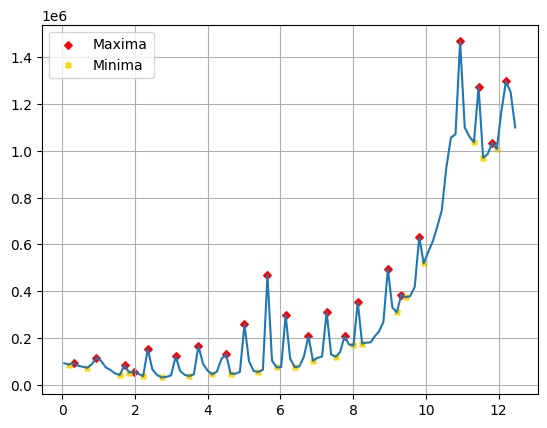

21 100


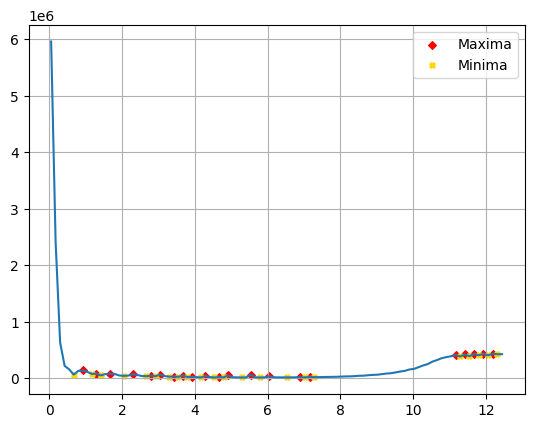

26 100


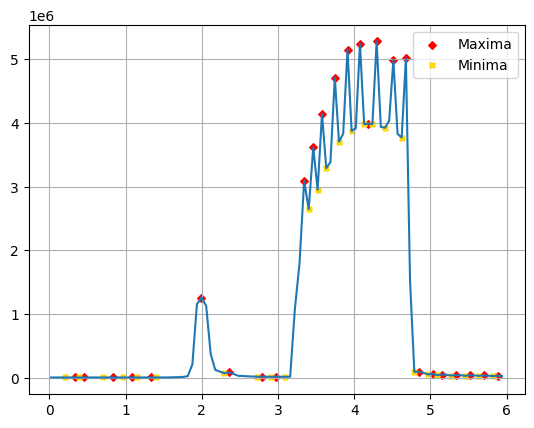

21 100


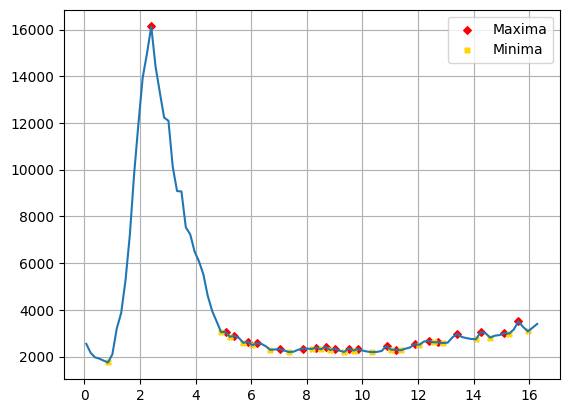

19 100


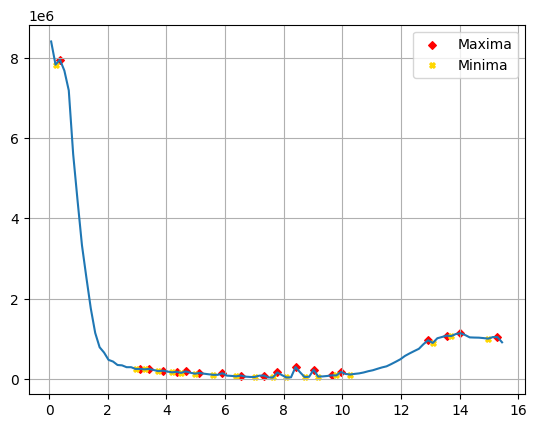

17 100


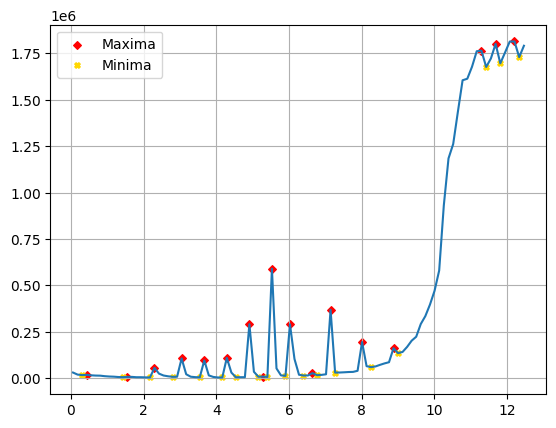

18 100


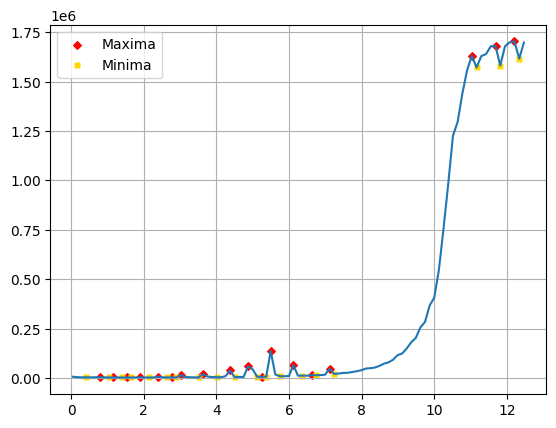

20 100


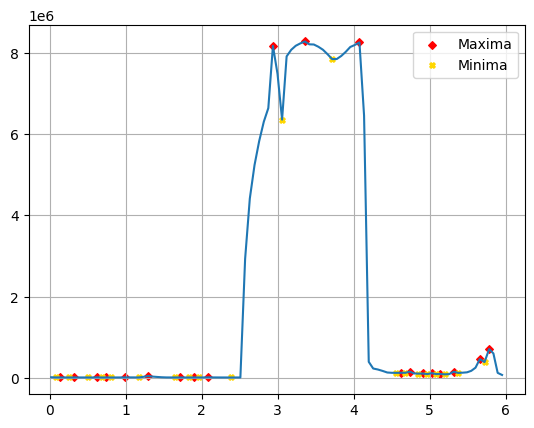

28 100


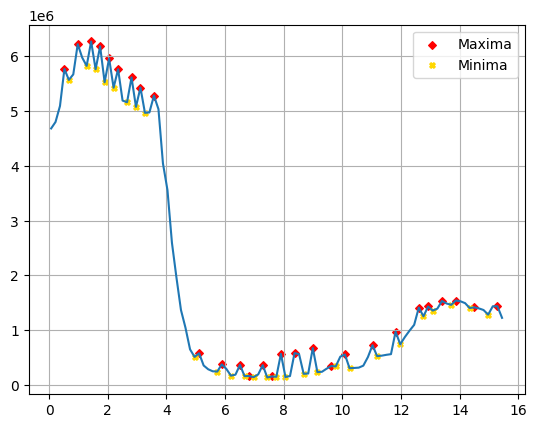

22 100


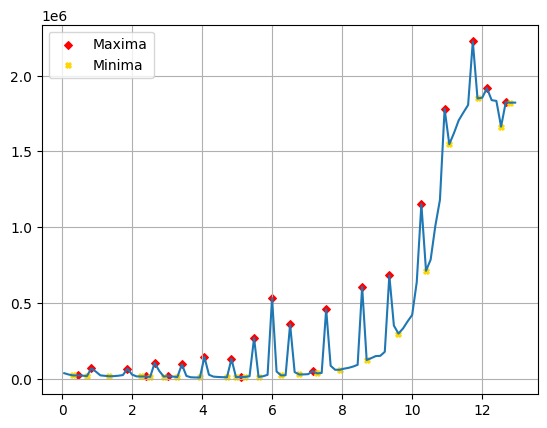

27 100


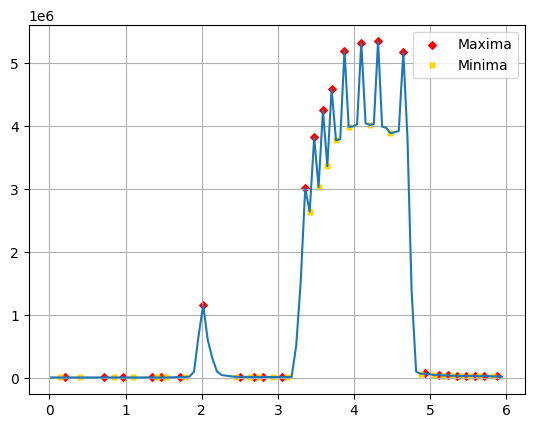

23 100


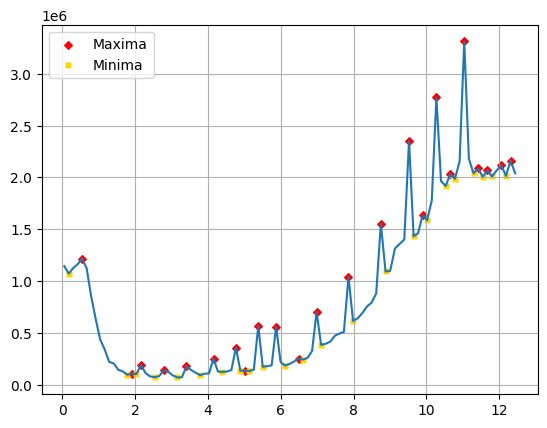

23 100


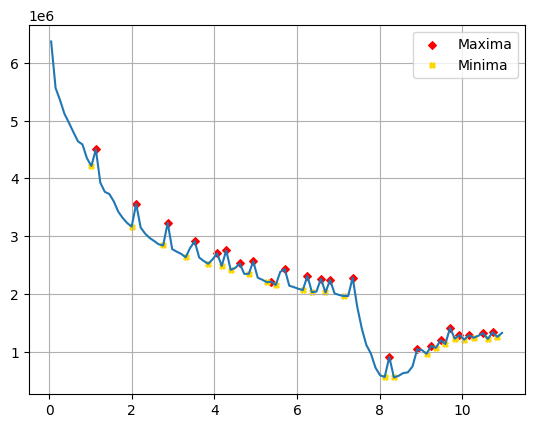

20 100


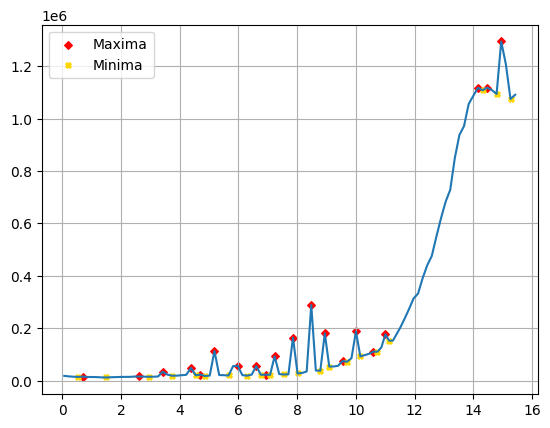

18 100


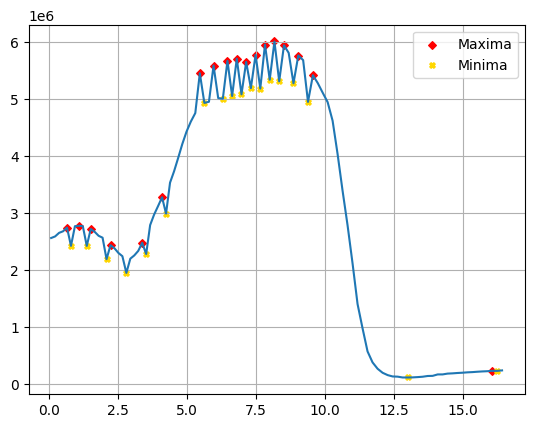

25 100


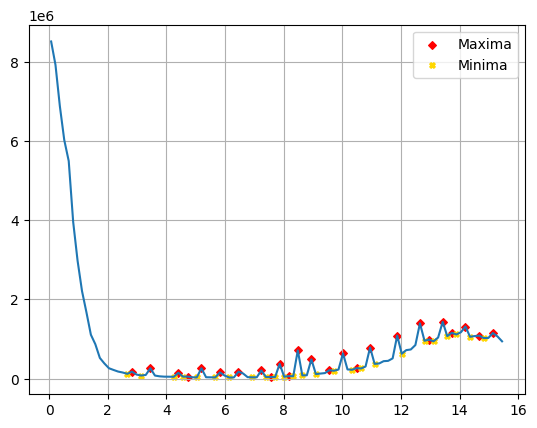

27 100


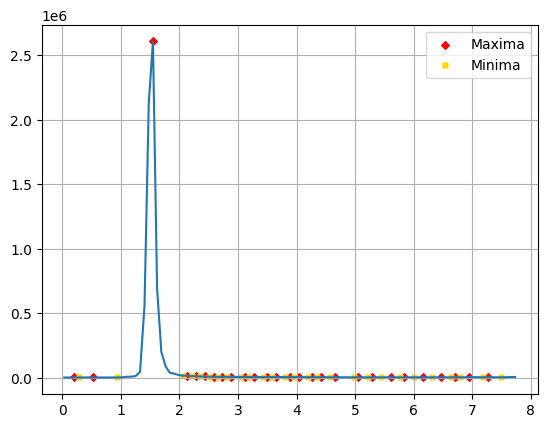

11 100


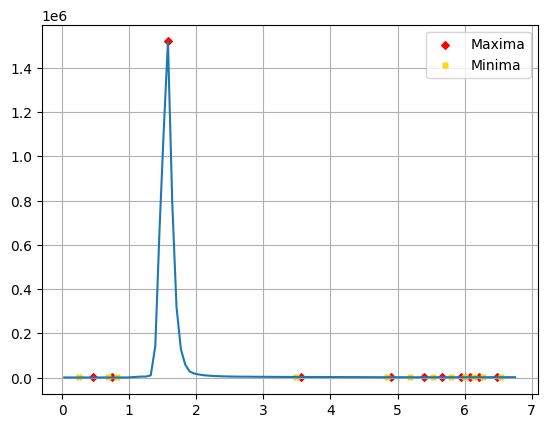

22 100


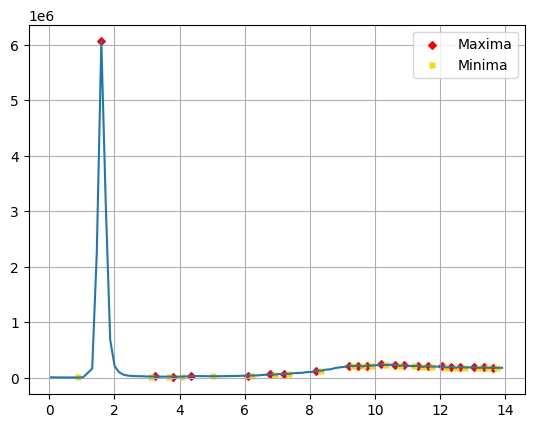

18 100


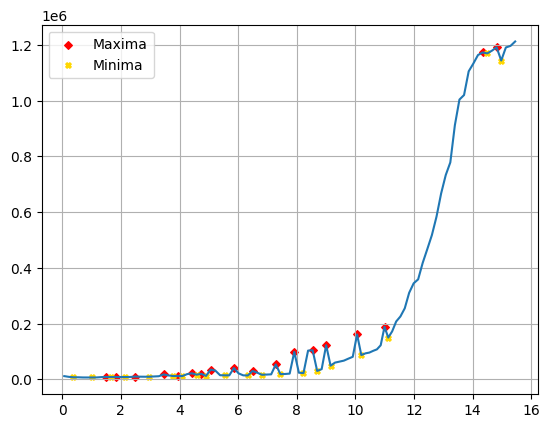

27 100


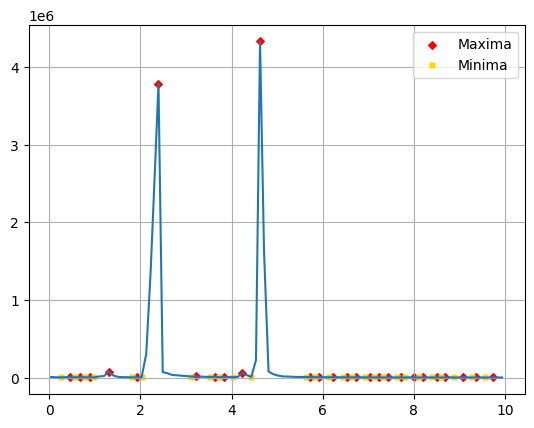

19 100


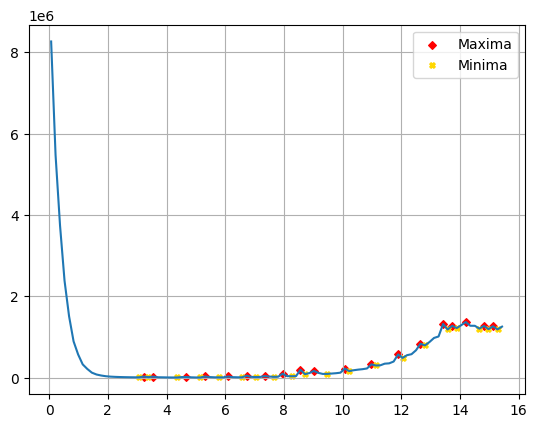

23 100


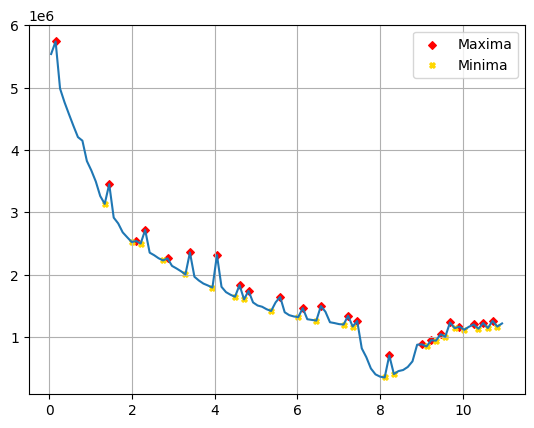

21 100


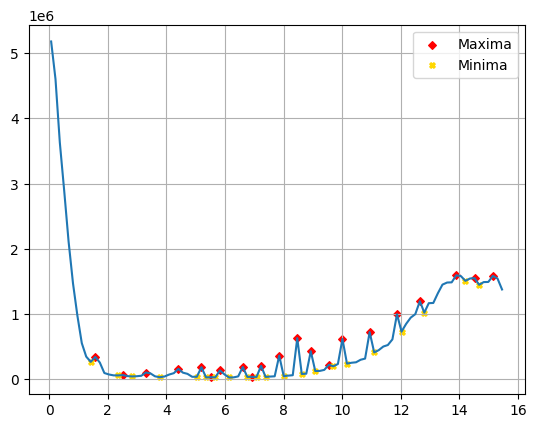

19 100


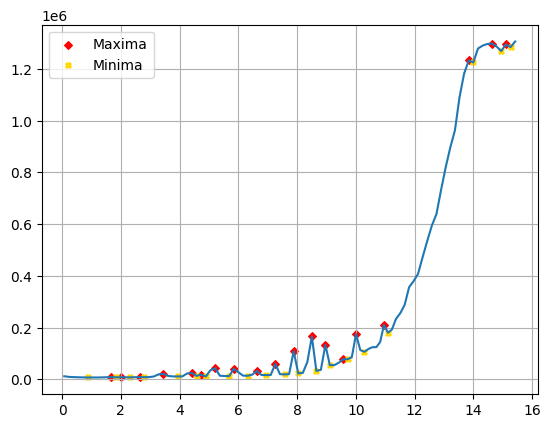

29 100


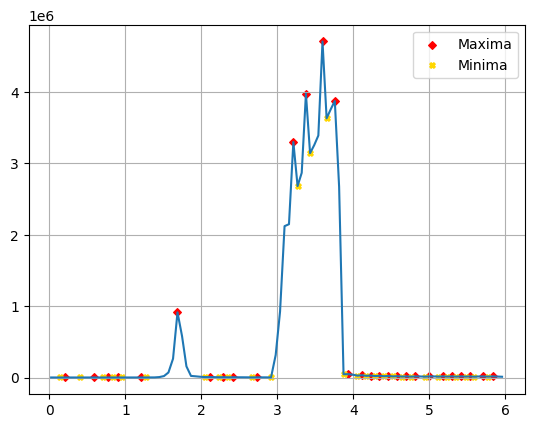

27 100


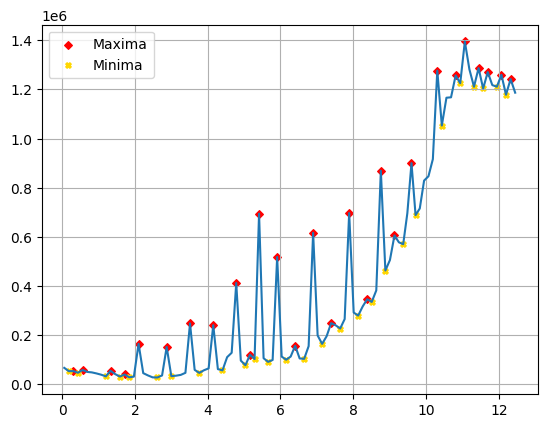

29 100


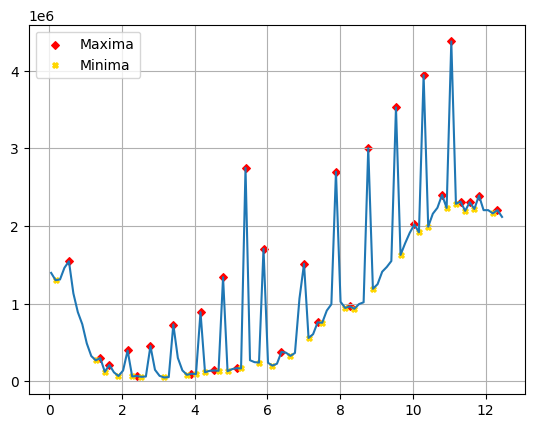

26 100


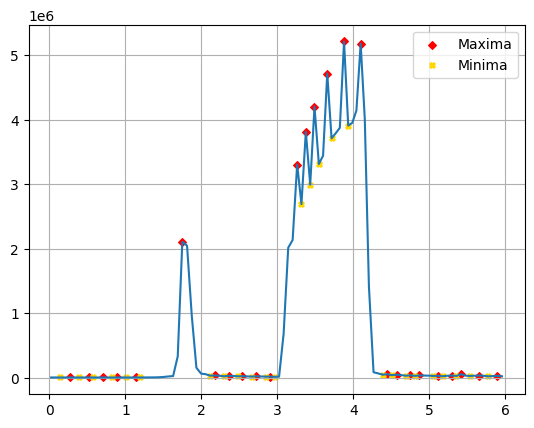

20 100


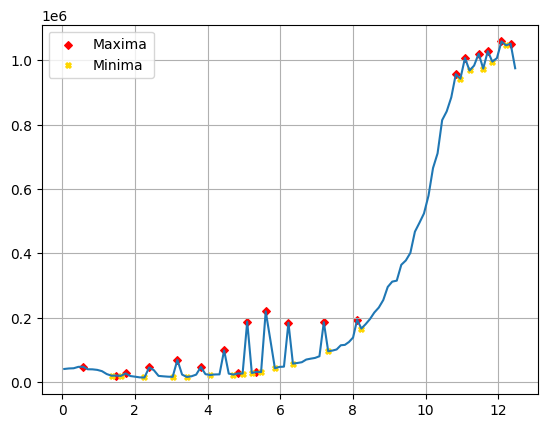

22 100


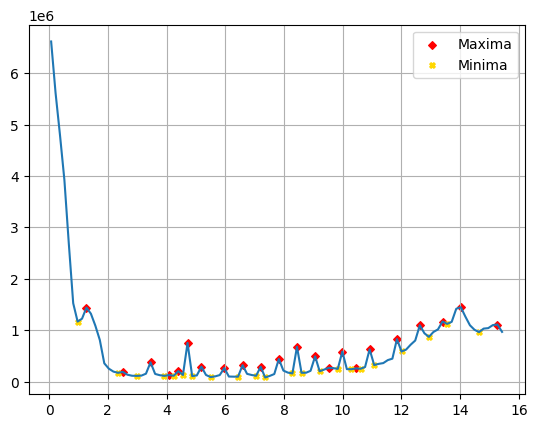

21 100


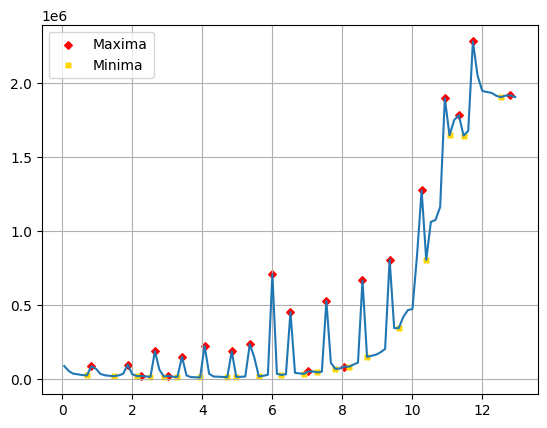

26 100


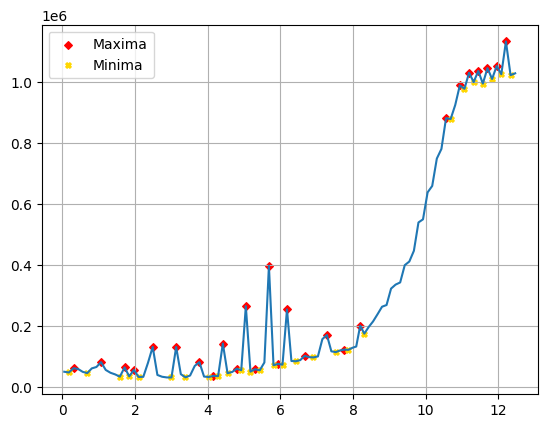

30 100


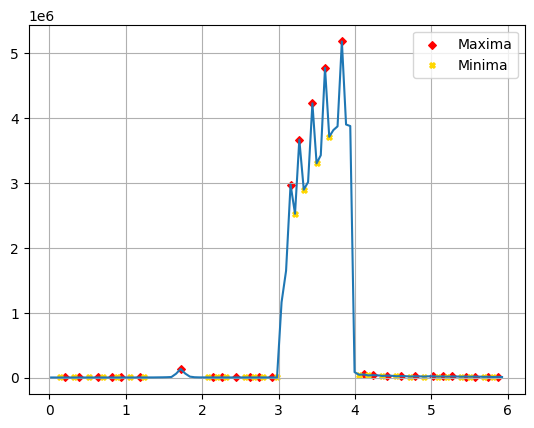

16 100


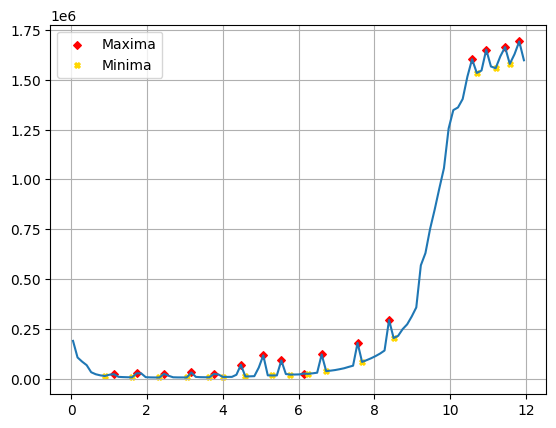

23 100


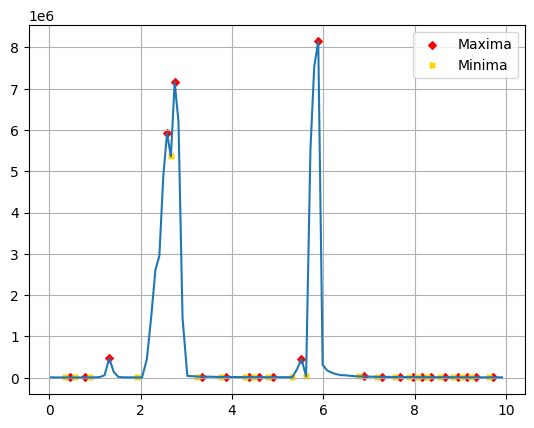

21 100


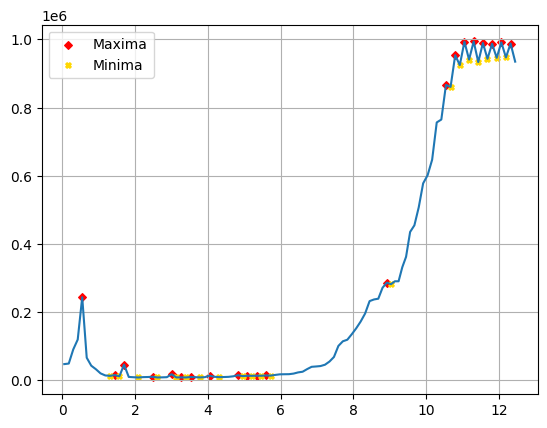

28 100


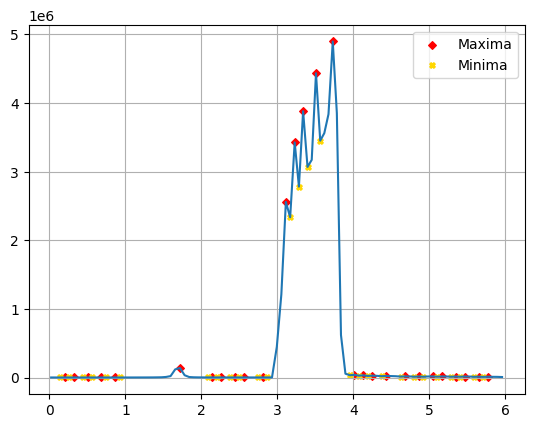

18 100


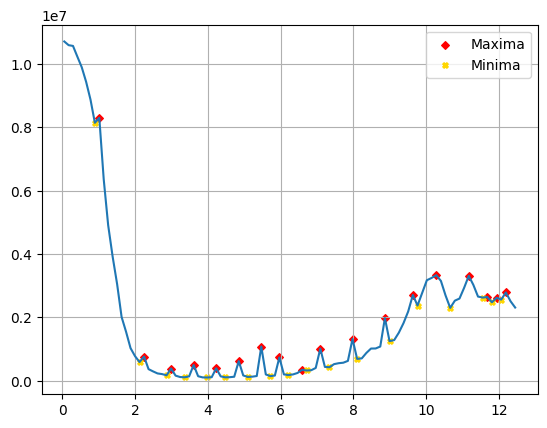

27 100


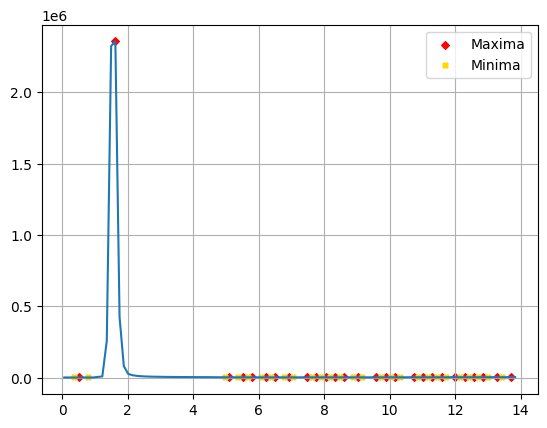

14 100


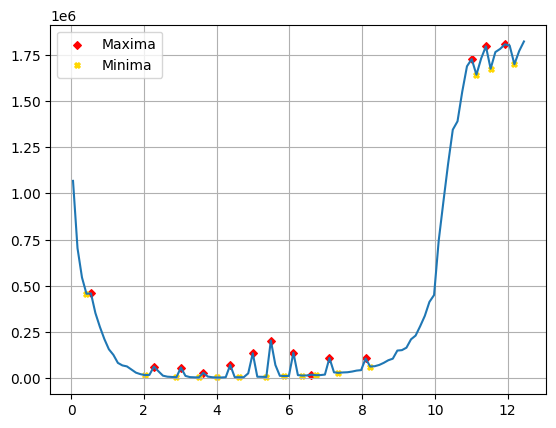

16 100


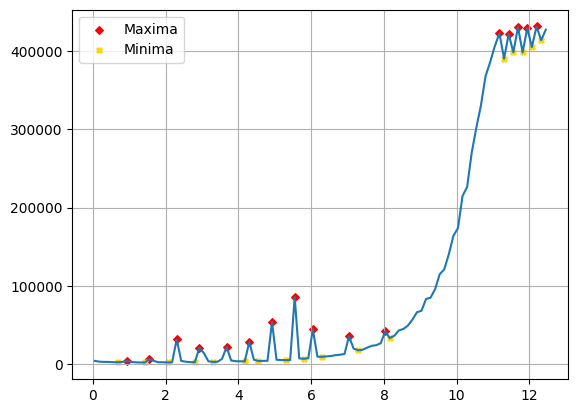

32 100


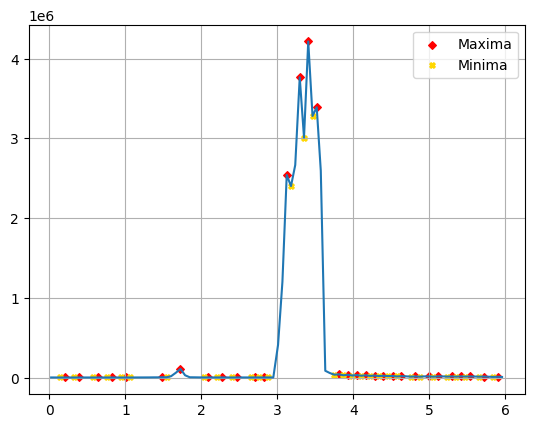

22 100


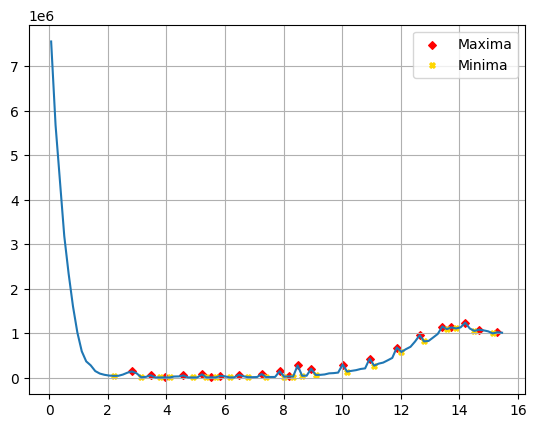

22 100


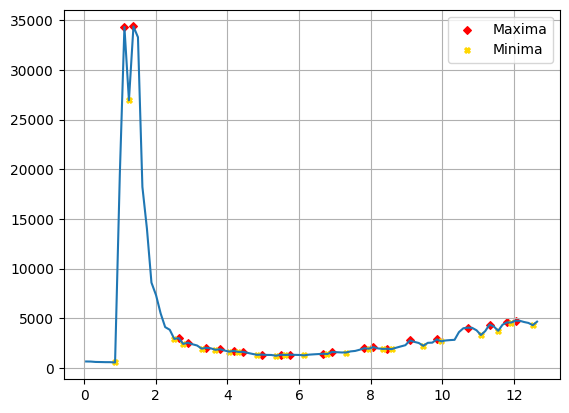

15 100


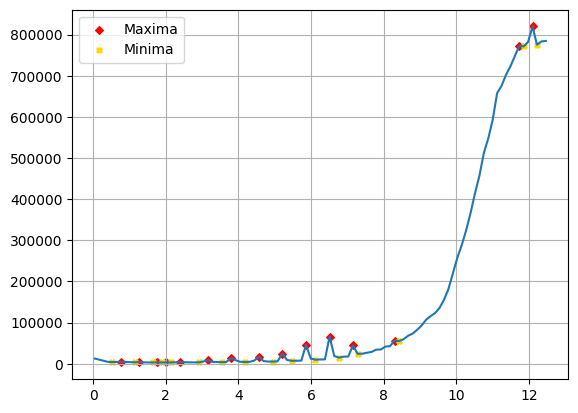

19 100


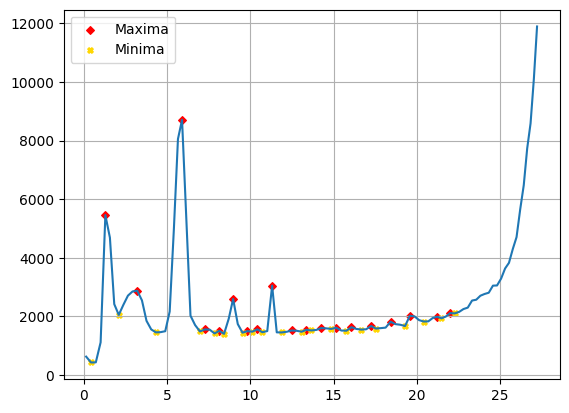

30 100


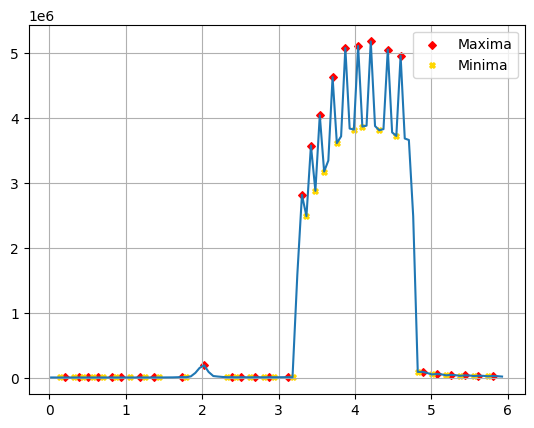

17 100


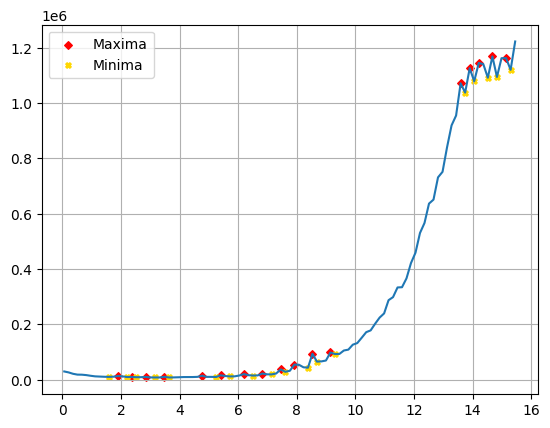

17 100


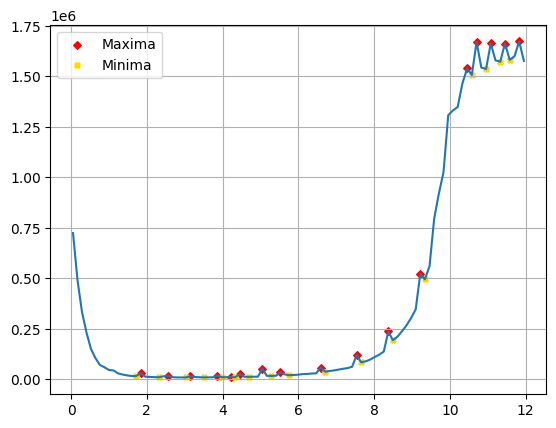

18 100


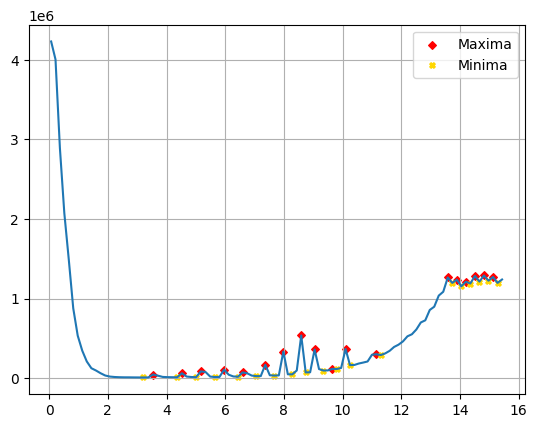

18 100


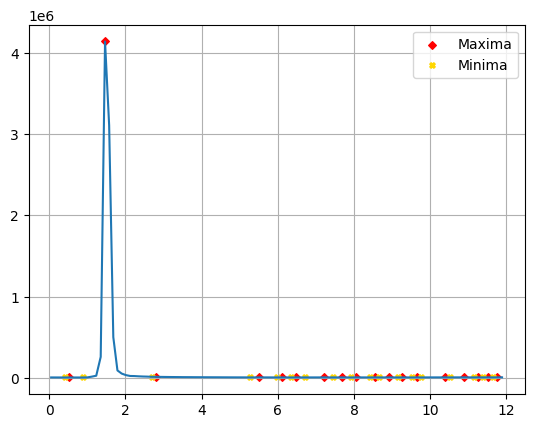

22 100


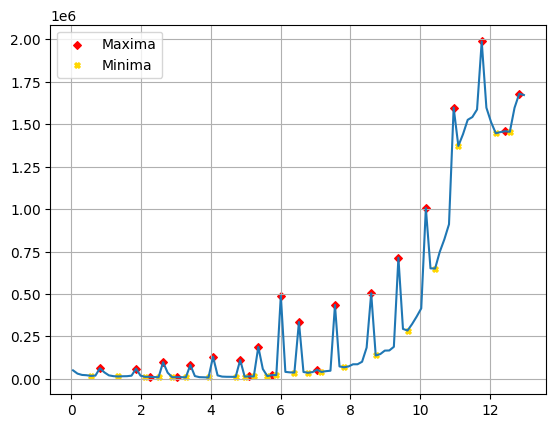

22 100


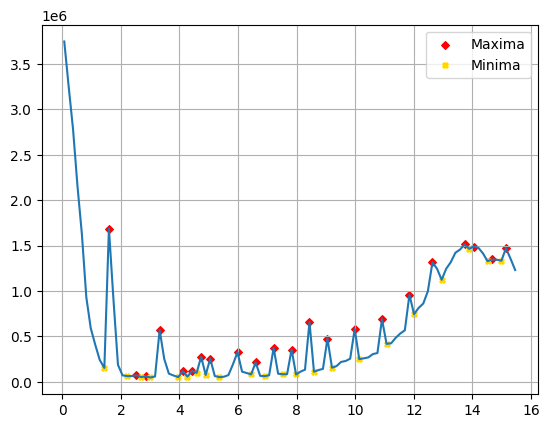

26 100


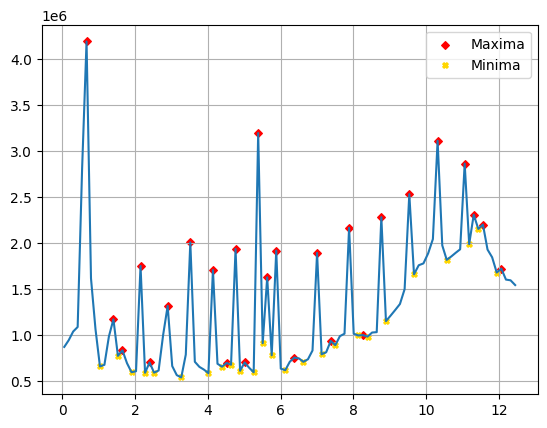

26 100


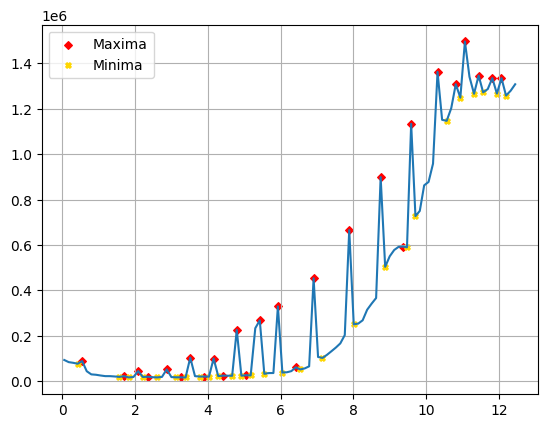

25 100


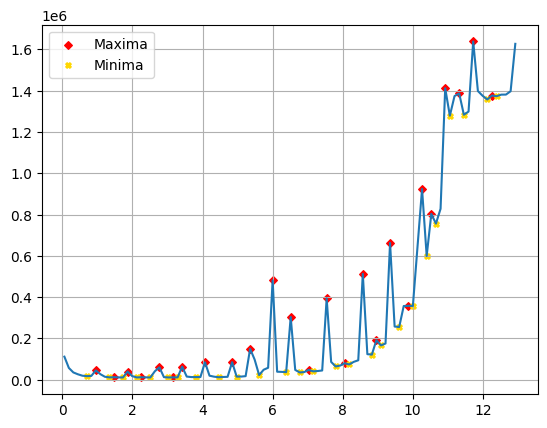

21 100


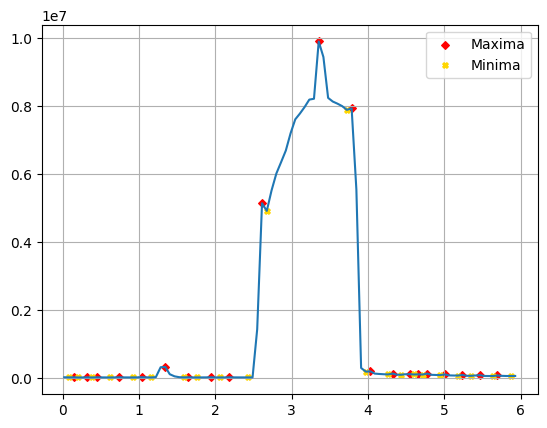

20 100


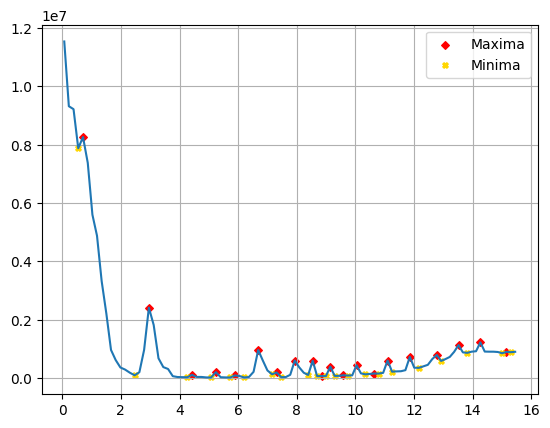

24 100


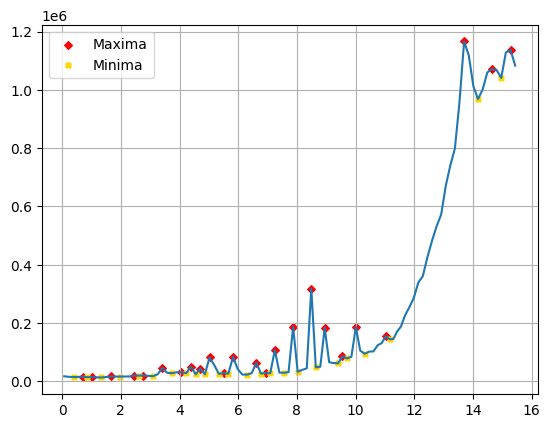

13 100


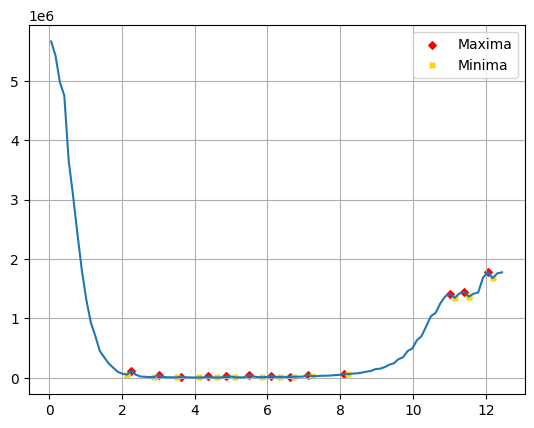

22 100


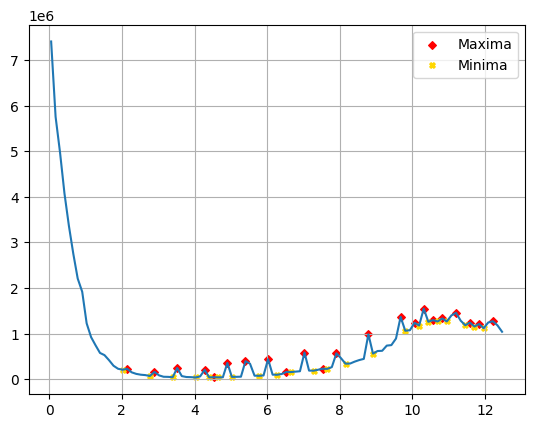

23 100


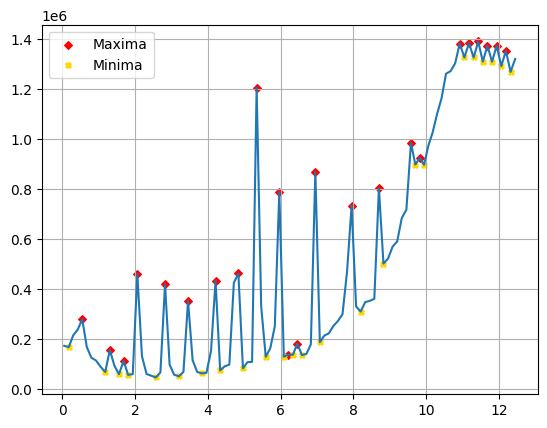

22 100


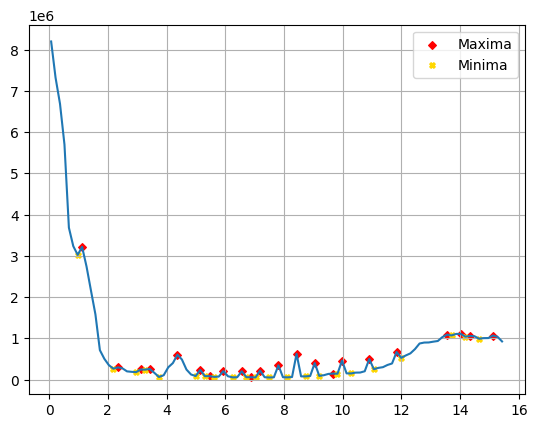

26 100


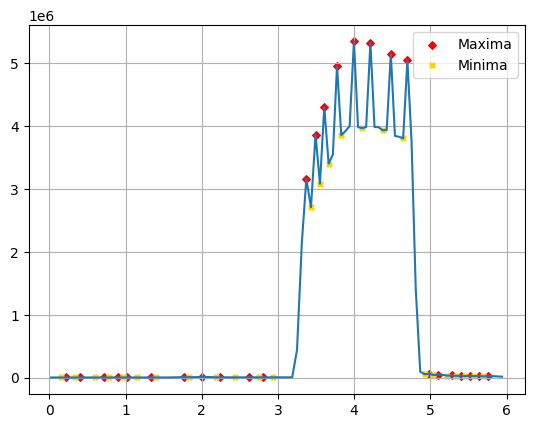

27 100


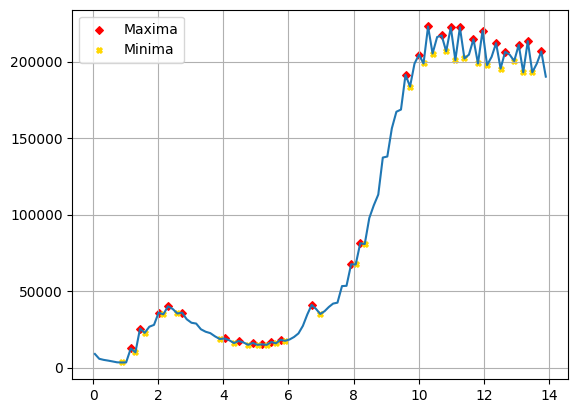

16 100


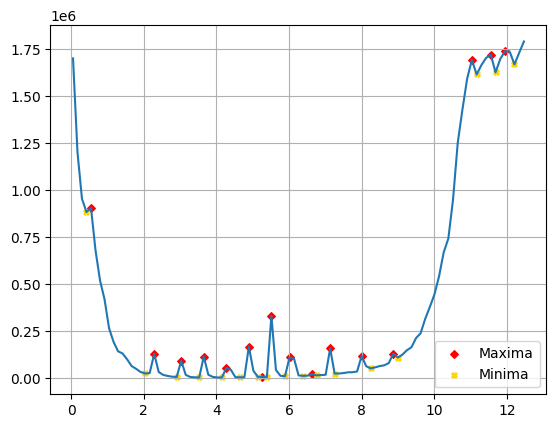

20 100


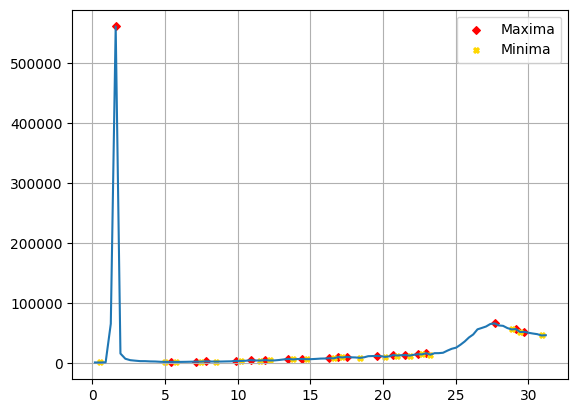

28 100


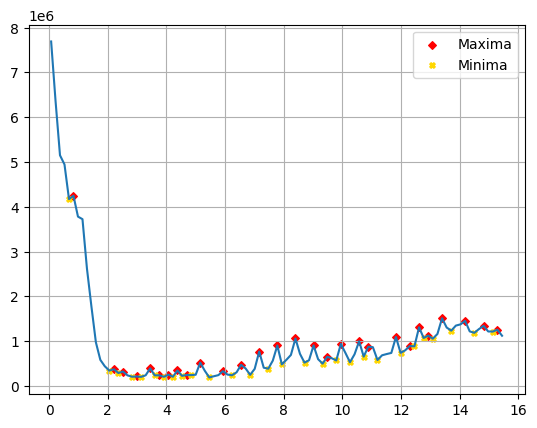

24 100


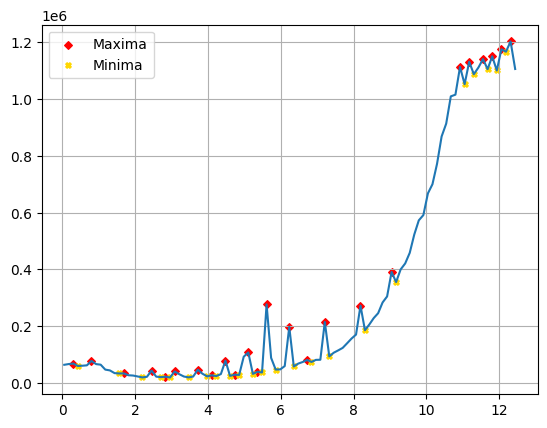

19 100


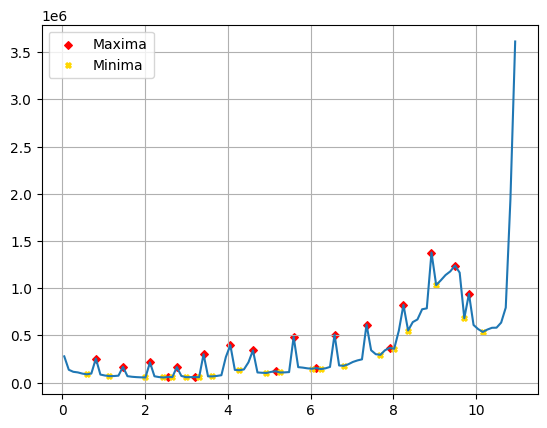

23 100


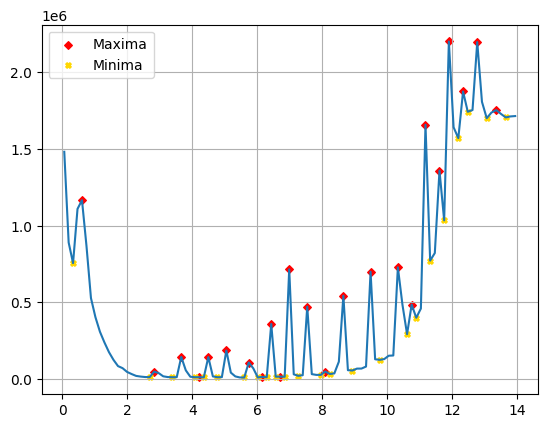

22 100


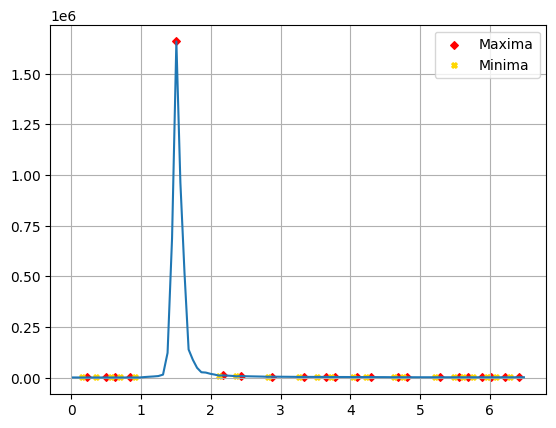

15 100


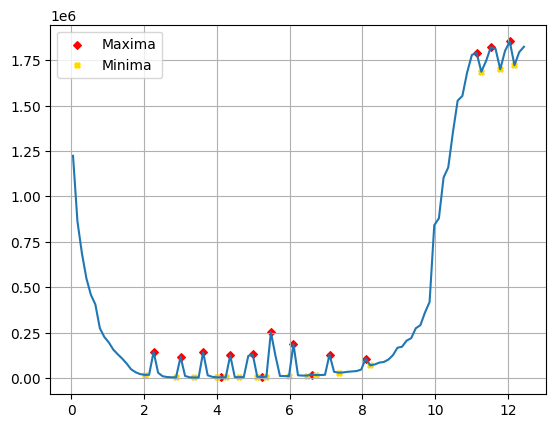

36 100


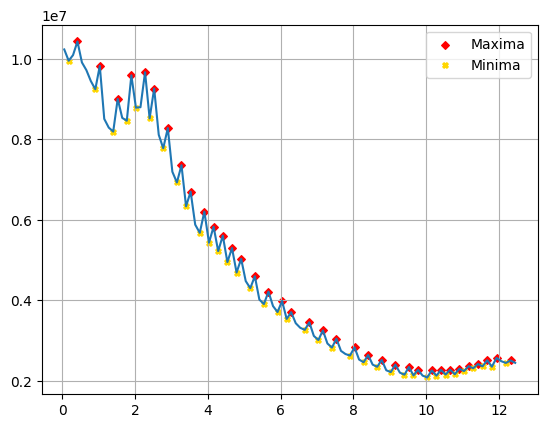

20 100


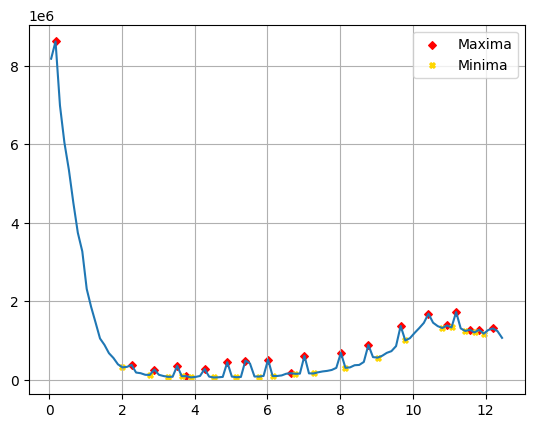

14 100


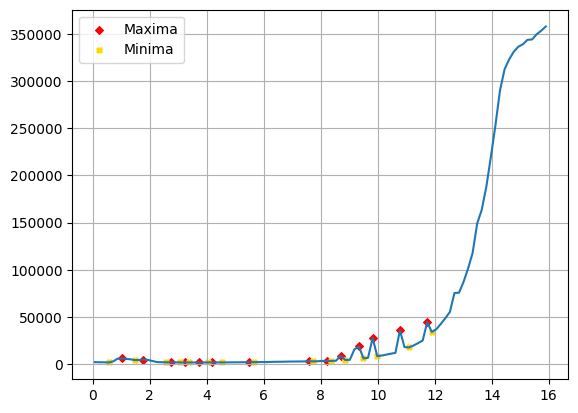

27 100


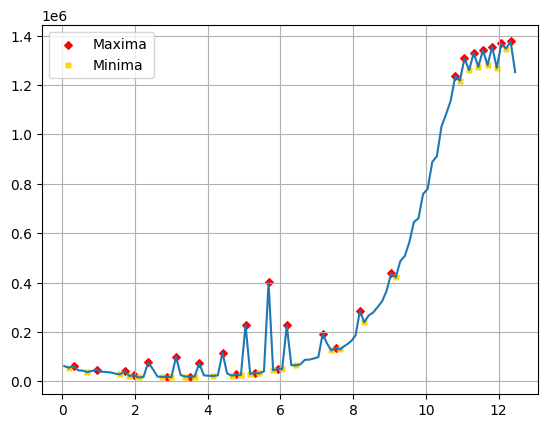

24 100


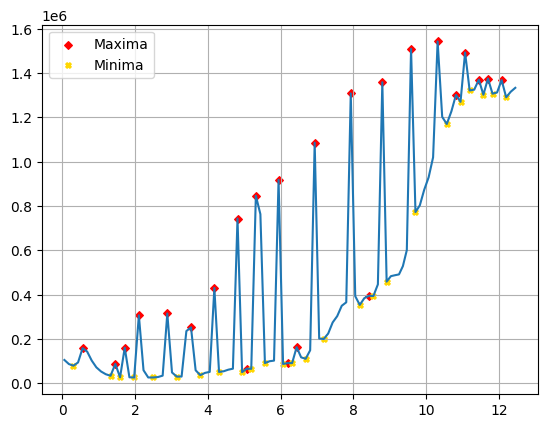

26 100


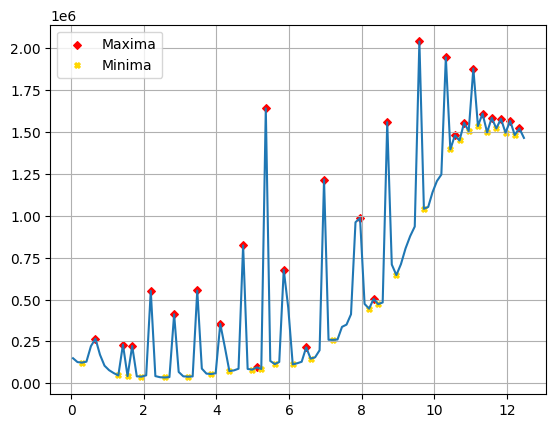

18 100


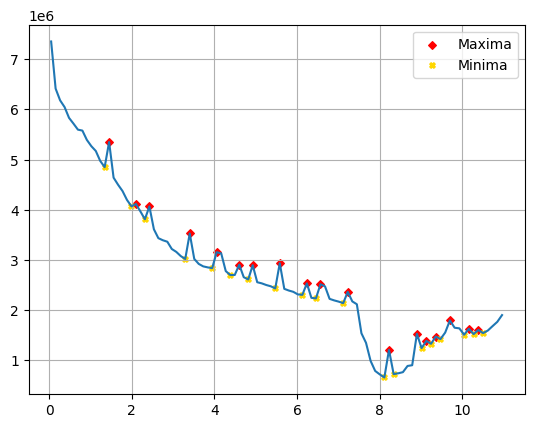

25 100


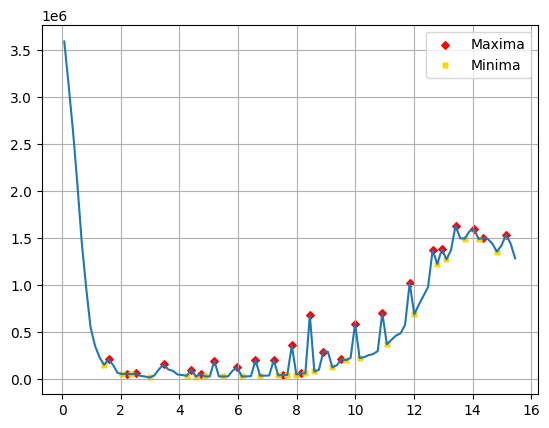

30 100


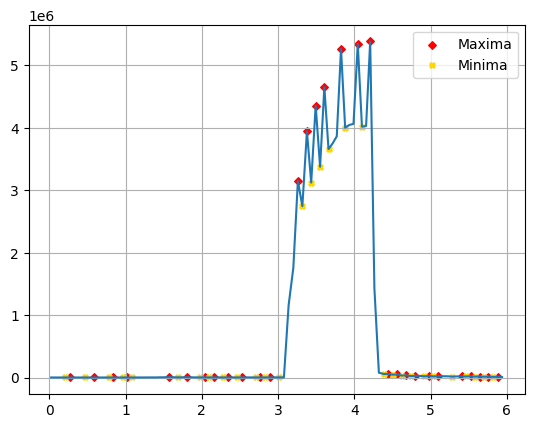

22 100


KeyboardInterrupt: 

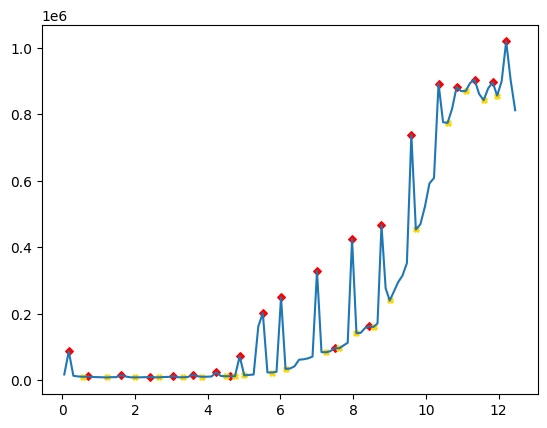

In [ ]:

feature_length = 100 ## extracting these many values from a data set entry

X = []
y = []
test = []
set_label = 'hydrocarbon'
for i in range(0,len(data_info)):
    sample_id, split, derivatized, path = data_info[cols].iloc[i]
    if split == 'train':
        label = data_label[set_label].iloc[i]
        label_sum = data_label.iloc[i][1:].sum()
        # if label!=1 or label_sum != 1 or derivatized:
        if label!=1 or label_sum != 1:
        # if label!=1:
            continue
    else: continue
    data = pd.read_csv(path)
    data['time'] -= data['time'].min()
    # df = data.groupby(['time']).mean()
    # df['time'] = df.index

    df = data
    data_length = len(df)
    batch_size = data_length // feature_length

    # Initialize lists to store the batch features
    mean_time = []
    mean_mass = []
    mean_intensity = []

    features = []
    # Iterate over the batches
    for i in range(feature_length):
        # Calculate the start and end indices of the current batch
        start_idx = i * batch_size
        end_idx = start_idx + batch_size

        # Extract the current batch from the dataset
        batch = df.iloc[start_idx:end_idx]

        # Calculate the mean of time, mass, and intensity for the current batch
        mean_time.append(batch['time'].mean())
        mean_mass.append(batch['mass'].mean())
        mean_intensity.append(batch['intensity'].mean())
    features = mean_mass + mean_time + mean_intensity
    features.append(derivatized)
    if split == 'train':
        X.append(copy.deepcopy(features))
        y.append(label)
    else:
        test.append(copy.deepcopy(features))

    #for data visualization

    # Combine the batch features into a single dataframe
    batch_features = pd.DataFrame({
        'time': mean_time,
        'mean_mass': mean_mass,
        'intensity': mean_intensity
    })


    plot_peaks(batch_features)
    # break


In [13]:
def peak_mass(df, df_mass, num = None):
    y = df_mass['intensity'].values
    peaks = find_peaks(y, height = 1e5, threshold = 1, distance = len(df)/30)
    peak_ind = peaks[0]
    peak_mass = np.array(df_mass.mass.iloc[peak_ind].values)
    peak_height = np.array(peaks[1]['peak_heights'])

    peaks = np.column_stack([peak_mass, peak_height])
    peaks = sorted(peaks,key = lambda x:x[1], reverse = True)
    if num == None:
        num = len(peaks)
    else:
        peaks = peaks[:num]
    return np.array(peaks)


In [14]:
# chlorine_bearing_compound                          [791  18]
# sulfur_bearing_compound                            [778  31]
# alcohol                                            [783  26]
# other_oxygen_bearing_compound                      [788  21]
# mineral   

In [18]:
set_label = 'chlorine_bearing_compound'
print(set_label)
masses = []
for i in range(0,len(data_info)):
    sample_id, split, derivatized, path = data_info[cols].iloc[i]
    if split == 'train':
        label = data_label[set_label].iloc[i]
        label_sum = data_label.iloc[i][1:].sum()
        # if label!=1 or label_sum != 1 or derivatized:
        # if label!=1 or label_sum != 1:
        if label!=1:
            continue
    else: continue
    data = pd.read_csv(path)
    data['time'] -= data['time'].min()
    # df = data.groupby(['time']).mean()
    # df['time'] = df.index 
    # df = data.sort_values(by = 'mass')
    df = data
    df_time = data
    df_mass = data.sort_values(by = 'mass')
    

    # Perform further analysis or save the extracted features as needed
    # extract peaks
    peaks = peak_mass(df, df_mass)
    # print(peaks)
    # break
    

    # Print the extracted features
    
    # plt.plot(features_df['retention_time'], features_df['peak_area'])
    # plt.figure(figsize = (20,4))
    # plt.subplot2grid(shape=(2,4),loc=[0,0],rowspan = 2, colspan=2)
    # df_mass_ = df_mass
    # plt.plot(df_mass['mass'], df_mass['intensity'])
    # sns.lineplot(x=df_time['time'], y=df_time['intensity'])
    
    

    # print( len(peak_height))
    # print((peak_height))
    
    # plt.scatter(peaks[:,0],peaks[:,1])
    # break
    # peaks_mass = df_mass.iloc[peaks[0]].mass.values
    # peaks_mass = np.array(peaks_mass).astype(int)
    # peaks_mass_un = np.unique(peaks_mass) 
    # plt.scatter(peak)
    # print(peaks_mass)
    # break
    # plt.plot(peaks_mass)
    # for mass in peaks_mass:
    # plt.ylim((1e5,3e9))
    for j,mass in enumerate(peaks):
        masses.append(mass)
        # if j == 0:
        #     plt.subplot2grid(shape=(2,4),loc=[0,2])
        # elif j == 1:
        #     plt.subplot2grid(shape=(2,4),loc=[0,3])
        # elif j == 2:
        #     plt.subplot2grid(shape=(2,4),loc=[1,2])
        # elif j == 3:
        #     plt.subplot2grid(shape=(2,4),loc=[1,3])
        # mass_thresh = range(int(mass - 1), int(mass + 1))
        # mass_thresh = range(int(mass - 1), int(mass + 1))
        # df_time_1 = df_time.loc[(df_time.mass).astype(int).isin(mass_thresh)]
        
        # df_time_1 = df_time.loc[(df_time.mass).between(int(mass),int(mass)+.1)]
        # df_time_1 = df_time.loc[df_time.mass.astype(int)==int(mass)]
        # plt.plot(df_time_1['time'],df_time_1['intensity'],label = mass)
        # plt.legend()
    # break
    # sns.lineplot(x=df_mass['mass'], y=df_mass['intensity'])
    # plt.show()
    # break
# masses.sort()
print(masses)
    

chlorine_bearing_compound
[array([1.8169250e+01, 4.2696448e+08]), array([4.4081772e+01, 1.6294234e+07]), array([2.07073792e+02, 2.14066100e+06]), array([1.02138535e+02, 1.53941100e+06]), array([6.4043167e+01, 1.0884900e+06]), array([7.9027054e+01, 4.3041600e+05]), array([2.60138123e+02, 4.02188000e+05]), array([2.80122803e+02, 3.38333000e+05]), array([1.35120667e+02, 3.37511000e+05]), array([1.91077789e+02, 2.39612000e+05]), array([   231.120911, 227024.      ]), array([   119.107346, 102837.      ]), array([1.46881195e+02, 1.52255488e+09]), array([1.80519870e+01, 1.33321114e+09]), array([7.50606380e+01, 9.17648384e+08]), array([5.80597230e+01, 8.05008512e+08]), array([1.89026764e+02, 5.25677952e+08]), array([1.27091568e+02, 1.22874000e+08]), array([4.2146393e+01, 9.8135728e+07]), array([2.81119507e+02, 4.13527040e+07]), array([1.03088715e+02, 2.20593920e+07]), array([2.31113495e+02, 2.05581840e+07]), array([2.07112762e+02, 2.72042300e+06]), array([1.63170258e+02, 1.29723200e+06]), arr

In [1]:
# plt.hist(df_mass['intensity'].values, bins = df_mass['mass'].values  )

In [25]:
mass_np = np.array(masses)

In [43]:
mass_np=sorted(mass_np,key = lambda x: x[1])

In [48]:
print(mass_np[0][:])

[   119.107346 102837.      ]


In [36]:
# mass_np[:,1]

In [44]:
# masses.sort()
plt.figure(figsize=(20,10))
i=0
plt.plot(mass_np[:][0],mass_np[:,1])
# plt.ylim((i,i+100))


TypeError: list indices must be integers or slices, not tuple

<Figure size 2000x1000 with 0 Axes>

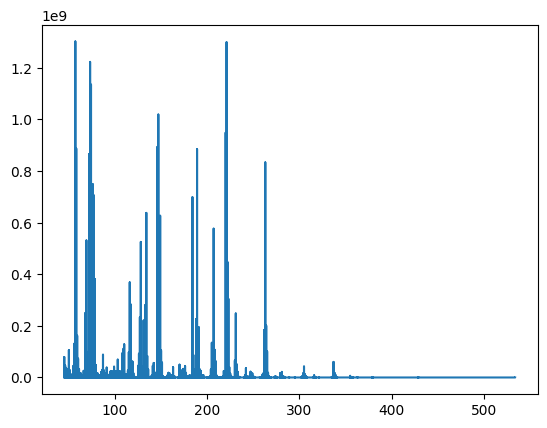

In [22]:
df_mass_ = df_mass
df_mass_['mass'] = df_mass['mass'].astype(int)
plt.plot(df_mass_['mass'], df_mass_['intensity'])

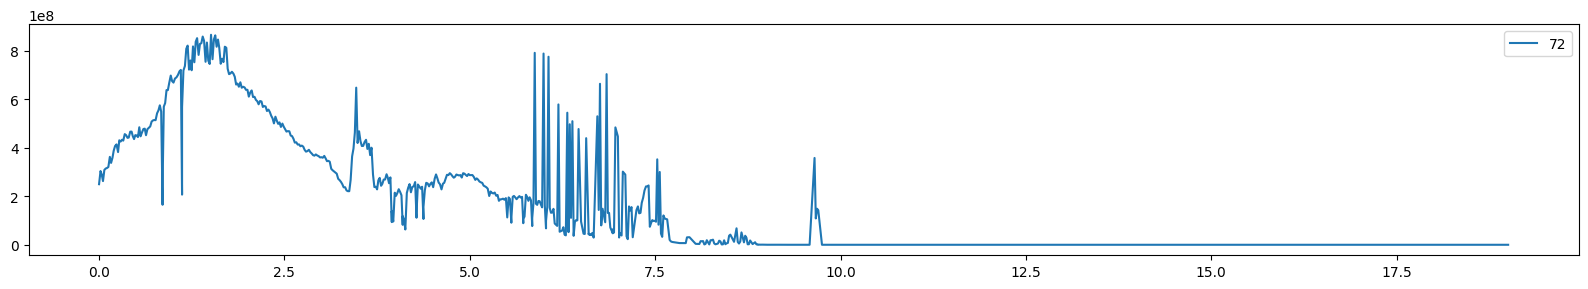

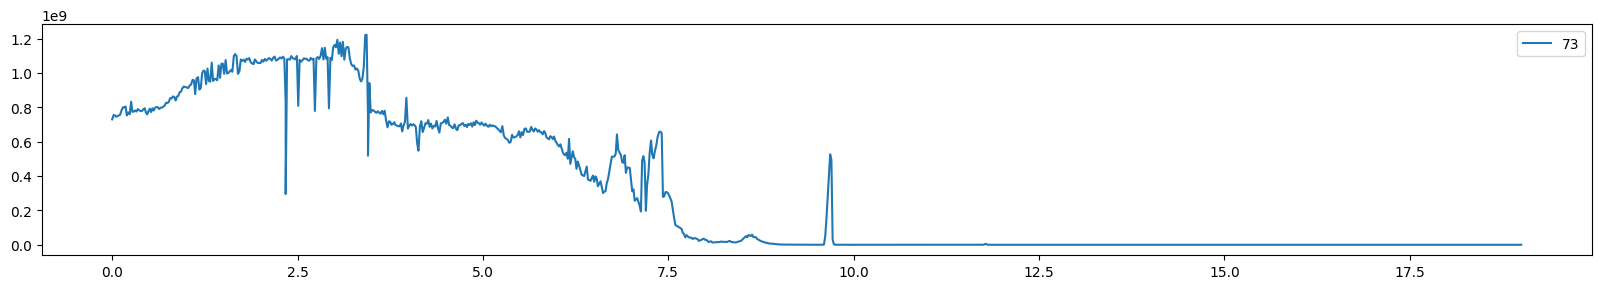

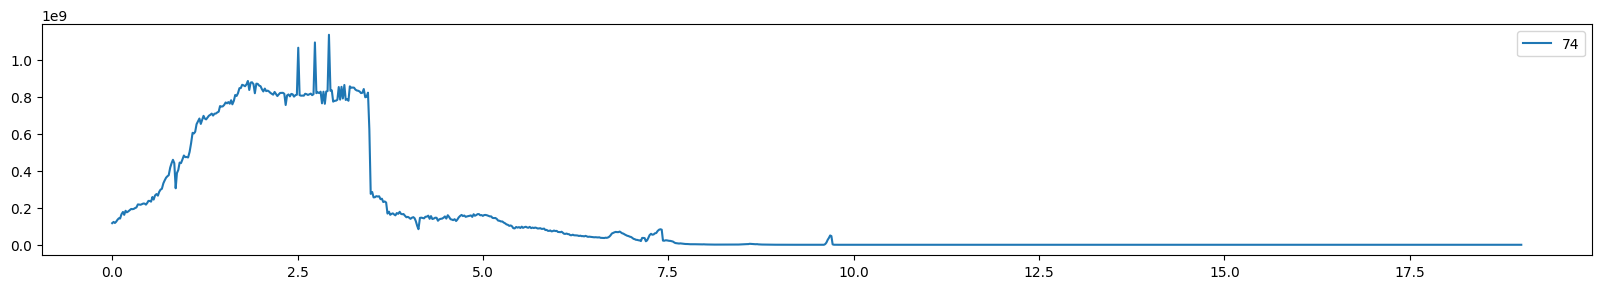

In [48]:
df_time_ = df_time
# df_time_['mass'] = df_time['mass'].astype(int)
df_time_['intensity']-=df_time_['intensity'].min()
for mass in range(72,75):
    # mass =
    plt.figure(figsize=(20,3))
    df_time__ = df_time_.loc[df_time_.mass == mass]
    plt.plot(df_time__['time'], df_time__['intensity'],label = mass)
    plt.legend()
    plt.show()
    # break

In [49]:
df_time.mass.value_counts().sort_values()


mass
146     657
188     749
261     786
145     805
273     843
       ... 
73     1167
45     1167
205    1181
207    1185
75     1204
Name: count, Length: 490, dtype: int64